# ROR2
ROR2 is a member of a large superfamily of transmembrane glycoproteins that function as cell surface receptors. 
[ brachydactyly type B1 (BDB1)](https://omim.org/entry/113000) is caused by heterozygous mutation in the ROR2 gene. 
[autosomal recessive Robinow syndrome-1 (RRS1)](https://omim.org/entry/268310) is caused by homozygous or compound heterozygous mutations in ROR2.

> [Schwarzer et al. (2009)](https://pubmed.ncbi.nlm.nih.gov/19640924/) noted that an R441* variant was associated with autosomal recessive Robinow syndrome, whereas a frameshift variant located at the same position led to dominant BDB1. The authors showed that RRS mutant proteins were less abundant and retained intracellularly, although BDB1 mutants were stable and predominantly located at the cell membrane.

We were not able to test this candidate correlation because of the small number of available cases leading to lack of statistical power.

It has been written that 
> the loss of ROR2 function in RRS patients is due to malfolding of the mutated ROR2 proteins and retention in the ER ([Bassam et al., 2007](https://pubmed.ncbi.nlm.nih.gov/17665217/)). 

However, we are aware of no resource to assign each published variant to this category.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.7.1.dev0


# ROR2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ROR2.

In [2]:
gene_symbol = 'ROR2'
mane_tx_id = 'NM_004560.4'
mane_protein_id = 'NP_004551.2' # tyrosine-protein kinase transmembrane receptor ROR2 isoform 1 precursor

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.20") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
len(phenopackets)


cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 25/25 [00:01<00:00, 13.46individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #6
    diseases
      #0
       warnings:
       ·`time_element` is in currently unsupported format `ontology_class`
  patient #12
    diseases
      #0
       warnings:
       ·`time_element` is in currently unsupported format `ontology_class`
  patient #16
    diseases
      #0
       warnings:
       ·`time_element` is in currently unsupported format `ontology_class`


In [4]:
from gpsea.view import CohortViewer

viewer = CohortViewer(hpo=hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Mesomelia,HP:0003027,25
Anteverted nares,HP:0000463,24
Short stature,HP:0004322,24
Brachydactyly,HP:0001156,23
Prominent forehead,HP:0011220,23
Hypertelorism,HP:0000316,23
Hemivertebrae,HP:0002937,22
Short nose,HP:0003196,22
Wide nasal bridge,HP:0000431,21
Midface retrusion,HP:0011800,21


<Axes: title={'center': 'Tyrosine-protein kinase transmembrane receptor ROR2\ntranscript: NM_004560.4, protein: NP_004551.2'}>

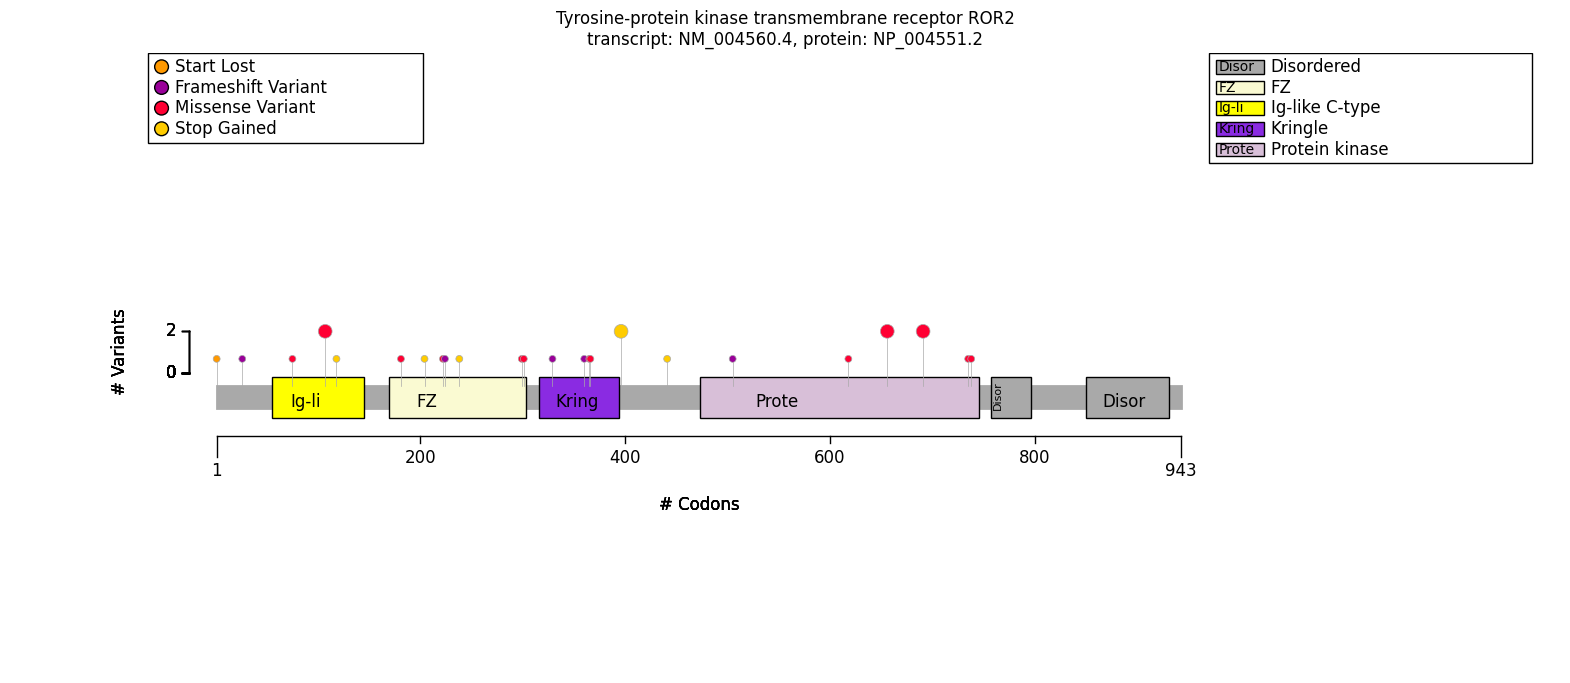

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService, configure_default_protein_metadata_service

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(mane_tx_id) 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizable, ProteinVisualizer

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [8]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)
len(pheno_predicates)
from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter(hpo=hpo,)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05
from gpsea.analysis.pcats.stats import FisherExactTest

count_statistic = FisherExactTest()
from gpsea.analysis.pcats import HpoTermAnalysis

analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=mtc_alpha,
)

In [10]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, biallelic_predicate
from gpsea.view import MtcStatsViewer

missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)


missense_predicate = biallelic_predicate(a_predicate=missense, 
                                   b_predicate=~missense, 
                                   a_label= "missense", 
                                   b_label="other",
                                   partitions=((0,1),(2,))
                                   )
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=missense_predicate,
    pheno_predicates=pheno_predicates,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,21
HMF03,Skipping term because of a child term with the same individual counts,24
HMF08,Skipping general term,54
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,83


In [11]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense/missense OR missense/other  ...          
                                                                                 Count  ...  p values
Broad thumb [HP:0011304]                                                          8/10  ...  0.099071
Long palpebral fissure [HP:0000637]                                               5/10  ...  0.171827
Pectus excavatum [HP:0000767]                                                     3/10  ...  0.198381
Short neck [HP:0000470]                                                           8/10  ...  0.204334
Bifid tongue [HP:0010297]                                                         9/10  ...  0.323308
...                                                                                ...  ...       ...
External genital hypoplasia [HP:0003241]                                         10/10  ...  1.000000
Abnormal external genitalia [HP:0000811]                                         10/10  ...  1.000000
Abnormality of male external genitalia [HP:0000...                                 9/9  ...  1.000000
Abnormal penis morphology [HP:0000036]                                             9/9  ...  1.000000
Hypoplastic labia minora [HP:0000064]                                              1/4  ...  1.000000

[98 rows x 6 columns]